# Face Detection Challenge

In [155]:
import numpy as np 
import pandas as pd

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [156]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...
23700,99,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,45 108 120 156 206 197 140 180 191 199 204 207...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

In [157]:
data_orig=data.copy()

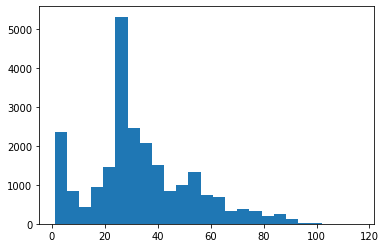

In [158]:
### TODO
import matplotlib.pyplot as plt
plt.hist(data.age,bins=25)
plt.show()

❓ Visually display one image of your choice.

In [159]:
### TODO
def print_image(index,serie=data.pixels):
    image=serie[index].split()

    for i in range(len(image)):
        image[i]=int(image[i])

    image_resized=np.resize(image,(48,48))


    plt.imshow(image_resized,cmap='gray')
    pass

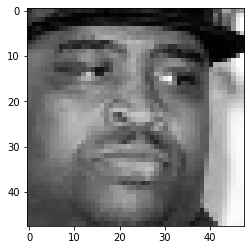

In [160]:
print_image(10000)

❓ What is the physical characteristic of the image at **index** `10000`?

In [161]:
# Store your result in the variable below

gender = "male"
# gender = "female"

# smile = True
smile = False

In [162]:
from nbresult import ChallengeResult
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [167]:
data['pix']=data.pixels

In [168]:
test=data['pix'][0]

In [132]:
## YOUR CODE

### modifying column pixels
def create_array_scaled(index):
    image=index.split()

    for i in range(len(image)):
        image[i]=int(image[i])/255

    return np.resize(image,(1,48,48)


In [176]:
### applying function
data.pix=data.pix.apply(lambda x: create_array_scaled(x))

In [180]:
data.pix.shape

(23705,)

In [133]:
#splitting dataframe accordingly
y=data.age
X=data.pixels

In [134]:
#reshaping X
X=np.resize(X,(23705,48,48))

In [135]:
X.shape

(23705, 48, 48)

In [118]:
#adding one dimension to X for CNN
from tensorflow.keras.backend import expand_dims
X=np.expand_dims(X,axis=3)

In [119]:
#plitting data
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [122]:
X_train

array([[[[array([[0.32156863, 0.23921569, 0.30196078, ..., 0.38431373, 0.45098039,
        0.45490196],
       [0.2745098 , 0.23921569, 0.27843137, ..., 0.41960784, 0.45098039,
        0.44705882],
       [0.23137255, 0.24705882, 0.30980392, ..., 0.45882353, 0.43137255,
        0.45098039],
       ...,
       [0.93333333, 0.90980392, 0.87058824, ..., 0.35294118, 0.35294118,
        0.35294118],
       [0.95294118, 0.94117647, 0.89019608, ..., 0.34901961, 0.34901961,
        0.35686275],
       [0.96862745, 0.95686275, 0.91372549, ..., 0.34901961, 0.34901961,
        0.35686275]])],
         [array([[0.11372549, 0.14509804, 0.18823529, ..., 0.21960784, 0.24313725,
        0.27843137],
       [0.12941176, 0.14117647, 0.19215686, ..., 0.2745098 , 0.24705882,
        0.25098039],
       [0.1254902 , 0.15686275, 0.19607843, ..., 0.25098039, 0.22352941,
        0.16078431],
       ...,
       [0.22352941, 0.23137255, 0.18823529, ..., 0.54509804, 0.54901961,
        0.55294118],
       [0.203

In [65]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [147]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  10.1M      0  0:00:28  0:00:28 --:--:-- 28.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  25.2M      0  0:00:04  0:00:04 --:--:-- 27.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   389k      0 --:--:-- --:--:-- --:--:--  389k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57023  100 57023    0     0   226k      0 --:--:-- --:--:-- --:--:--  226k


In [151]:
X_train.shape
X_train[0]

array([[[0.98823529],
        [0.98823529],
        [0.98431373],
        ...,
        [0.37254902],
        [0.31764706],
        [0.19607843]],

       [[0.98823529],
        [0.98823529],
        [0.98431373],
        ...,
        [0.36470588],
        [0.36078431],
        [0.30588235]],

       [[0.98823529],
        [0.98823529],
        [0.98823529],
        ...,
        [0.34901961],
        [0.3372549 ],
        [0.30588235]],

       ...,

       [[0.91372549],
        [0.80392157],
        [0.62352941],
        ...,
        [0.2745098 ],
        [0.61960784],
        [0.87843137]],

       [[0.75686275],
        [0.69019608],
        [0.54509804],
        ...,
        [0.36470588],
        [0.68235294],
        [0.89411765]],

       [[0.59607843],
        [0.55686275],
        [0.41568627],
        ...,
        [0.43137255],
        [0.70196078],
        [0.90980392]]])

In [148]:
y_train[0]

27

In [97]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():
    model = models.Sequential()
    
    ### First convolution & max-pooling
    # YOUR CODE HERE   
    
    model.add(layers.Conv2D(8, kernel_size=(4, 4), activation='relu', input_shape=(48, 48, 1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
     
    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))
    

    ### Last layer (let's say a classification with 10 output for 10 digits)
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
    
    model.summary() # Compare the number of parameters to the model with Dense layers
    
    return model

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(patience=5,restore_best_weights=True)

model=initialize_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 45, 45, 8)         136       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                38730     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 38,976
Trainable params: 38,976
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.3,
          callbacks=es)

Epoch 1/100


ValueError: in user code:

    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [94]:
print(model.evaluate(X_test, y_test, verbose=0))

ValueError: in user code:

    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/mikeplanche/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 1152 but received input with shape (None, 3872)


In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()